In [23]:
import pandas as pd
import os
import json
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import PIL
import PIL.Image

In [2]:
images_path = r'C:\Users\uriks\PycharmProjects\Identification-of-drawings\data\dataset\dataset\testing_data\images'
annotations_path = r'C:\Users\uriks\PycharmProjects\Identification-of-drawings\data\dataset\dataset\testing_data\annotations'

In [20]:
df = pd.DataFrame()
for fill_name in os.listdir(annotations_path):
    path = f"{annotations_path}/{fill_name}"
    name = fill_name.split('.')[0]
    f = open(path, encoding="utf-8")
    data = json.load(f)
    info_df = pd.json_normalize(data['form'])
    info_df['fil_name'] = name
    df = df.append(info_df)
df

,box,text,label,words,linking,id,fil_name
0,"[61, 127, 143, 211]",,other,"[{'box': [61, 127, 143, 211], 'text': ''}]",[],0,82092117
1,"[102, 345, 129, 359]",TO:,question,"[{'box': [102, 345, 129, 359], 'text': 'TO:'}]","[[1, 14]]",1,82092117
2,"[102, 406, 147, 423]",DATE:,question,"[{'box': [102, 406, 147, 423], 'text': 'DATE:'}]","[[2, 27]]",2,82092117
3,"[461, 440, 475, 455]",3,answer,"[{'box': [461, 440, 475, 455], 'text': '3'}]","[[19, 3]]",3,82092117
4,"[249, 84, 274, 98]",Fax:,question,"[{'box': [249, 84, 274, 98], 'text': 'Fax:'}]","[[4, 7]]",4,82092117
...,...,...,...,...,...,...,...
42,"[447, 701, 579, 714]",The space is being brdered by:,question,"[{'text': 'The', 'box': [447, 703, 467, 711]},...",[],42,93106788
43,"[448, 722, 577, 734]",LOAILLARD MEDIA SERVICES,other,"[{'text': 'LOAILLARD', 'box': [448, 723, 497, ...",[],43,93106788
44,"[447, 751, 622, 773]",Direct all invoices and full checking copies o...,other,"[{'text': 'Direct', 'box': [448, 751, 472, 764...",[],44,93106788
45,"[448, 785, 605, 828]",LORILLARD MEDIA SERVICES ONE PARK AVENUE 17TH ...,other,"[{'text': 'LORILLARD', 'box': [448, 785, 497, ...",[],45,93106788


In [21]:
df.label.unique()

array(['other', 'question', 'answer', 'header'], dtype=object)

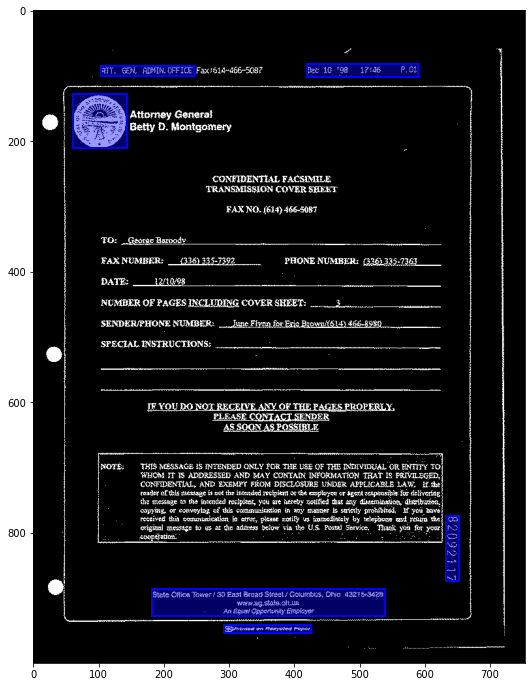

[False  True]


In [96]:

for name in df.fil_name.unique():
    im = np.array(PIL.Image.open(f'{images_path}/{name}.png').convert("1")
                 )
    fig,ax = plt.subplots(figsize=(12, 12))
    plt.imshow(im, cmap="binary")
    for lb in df[(df.fil_name == name)&(df.label == 'other')]['box']:
        x = lb[0]
        y = lb[1]
        w = lb[2] - lb[0]
        h = lb[3] - lb[1]
        rect = patches.Rectangle((x, y), w, h, linewidth=1, lw = 2,
                                 fc ='b', facecolor='none',alpha = 0.3)
        ax.add_patch(rect)
        rect = patches.Rectangle((x, y), w, h, lw=2,
                                 ec ='b', facecolor='none')
        ax.add_patch(rect)
    plt.show()
    print(np.unique(im))
    break  